Starting bit of code. This cell does all the imports, gives the words to be removed from our set(stopwords), and creates the text to be turned into indiviual words(newfanfic)

In [1]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
sstopwords = ["ourselves", "hers", "between", "yourself", "but", "again", "there", "about", "once", "during", "out", "very", "having", "with", "they", "own", "an", "be", "some", "for", "do", "its", "yours", "such", "into", "of", "most", "itself", "other", "off", "is", "s", "am", "or", "who", "as", "from", "him", "each", "the", "themselves", "until", "below", "are", "we", "these", "your", "his", "through", "don", "nor", "me", "were", "her", "more", "himself", "this", "down", "should", "our", "their", "while", "above", "both", "up", "to", "ours", "had", "she", "all", "no", "when", "at", "any", "before", "them", "same", "and", "been", "have", "in", "will", "on", "does", "yourselves", "then", "that", "because", "what", "over", "why", "so", "can", "did", "not", "now", "under", "he", "you", "herself", "has", "just", "where", "too", "only", "myself", "which", "those", "i", "after", "few", "whom", "t", "being", "if", "theirs", "my", "against", "a", "by", "doing", "it", "how", "further", "was", "here", "than"] 
fanfic = open('Cheerios.txt','r')
thing = fanfic.readlines()
newfanfic = []
for line in thing:
    if line[-1] == "\n":
        newfanfic.append(line[:-1])
    else:
        newfanfic.append(line)
newfanfic = (' '.join(newfanfic))


This cell removes disallowedcharacters from the set (replacing them with spaces) and turns the set into a list of words

In [2]:
disallowedcharcters = []
for letter in newfanfic:
    if letter.isalpha() == False:
        if letter != " ":
            if disallowedcharcters.count(letter) == 0:
                disallowedcharcters.append(letter)
disallowedcharcters.remove('’')
for disallowedcharacter in disallowedcharcters:
    conversion = newfanfic.maketrans(disallowedcharacter," ")
    newfanfic = newfanfic.translate(conversion)

spaces = [i for i, x in enumerate(list(newfanfic)) if x == " "]
x = 1
while spaces[x] != spaces[-1]:
    if spaces[x] - spaces[x-1] == 1:
        spaces.remove(spaces[x-1])
    else:
        x += 1
words = []
for x in range(len(spaces) - 1):
    words.append(((''.join(list(newfanfic)[spaces[x]+1:spaces[x+1]])).lower()).strip())
for word in words:
    if word in sstopwords:
        words.remove(word)
cloud = words


Creates biwords

In [3]:
biwords = []
for x in range(len(words) - 1):
    biwords.append(words[x] + " " + words[x+1])
biwords.sort()
uniquebiwords = {}
for word in biwords:
    uniquebiwords[word] = biwords.count(word)
    while biwords.count(word) > 0:
        biwords.remove(word)
    uniquebiwords = {k: v for k, v in sorted(uniquebiwords.items(), key=lambda item: item[1])}

This cell then sorts the words (makes finding amount of words easier) then makes a dictionary which gives the words and their frequency in order

In [4]:
words.sort()
uniquewords = {}
for word in words:
    uniquewords[word] = words.count(word)
    while words.count(word) > 0:
        words.remove(word)
    uniquewords = {k: v for k, v in sorted(uniquewords.items(), key=lambda item: item[1])}
print(uniquewords)

{'actual': 1, 'air': 1, 'amount': 1, 'annoying': 1, 'apologize': 1, 'assigned': 1, 'aw': 1, 'awkwardly': 1, 'backstabber': 1, 'backstabbing': 1, 'backwards': 1, 'beated': 1, 'block': 1, 'brave': 1, 'bursting': 1, 'certainly': 1, 'chasin': 1, 'cheered': 1, 'chuckling': 1, 'compared': 1, 'concern': 1, 'conquer': 1, 'containment': 1, 'costumes': 1, 'd': 1, 'delivered': 1, 'deposit': 1, 'directly': 1, 'disappeared': 1, 'disaster': 1, 'discuss': 1, 'dizzy': 1, 'dug': 1, 'easier': 1, 'electicity': 1, 'entrance': 1, 'ermm': 1, 'exchange': 1, 'exitted': 1, 'experrison': 1, 'failure': 1, 'forever': 1, 'froze': 1, 'gr': 1, 'group': 1, 'gun': 1, 'harm': 1, 'harmful': 1, 'harming': 1, 'hating': 1, 'headquarters': 1, 'hhehe': 1, 'hops': 1, 'hunt': 1, 'hurry': 1, 'hurts': 1, 'imagination': 1, 'infection': 1, 'injected': 1, 'knocks': 1, 'least': 1, 'legit': 1, 'lens': 1, 'liar': 1, 'married': 1, 'member': 1, 'met': 1, 'minute': 1, 'nerd': 1, 'nope': 1, 'noticing': 1, 'obeying': 1, 'passed': 1, 'place

Gives data in a more viusally appealing way

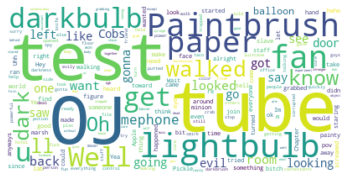

In [46]:
word_cloud = WordCloud(collocations = False, stopwords = ["said","I","and","the","she","to"] + sstopwords,background_color = 'white').generate(newfanfic)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()